In [25]:
import pandas as pd
import random
import re       # regular expression library
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
csv_file = 'money.csv'                              # the input csv file
topic_file = 'topics_'+csv_file
data_path = 'data/'+csv_file
topic_path = 'topics/'+topic_file
df = pd.read_csv(data_path)
df.head()

,text
0,"Let’s say I had an apple, and you had an orang..."
1,an apple.
2,"We could trade, and both of us would end up ha..."
3,"But now let’s say I had an apple tree, and you..."
4,"the apple tree were ready, but the oranges wou..."


In [27]:
# Remove punctuation
df['processed_text'] = \
df['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['processed_text'] = \
df['processed_text'].map(lambda x: x.lower())

# Print out the first rows of papers
df.head()

<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
/var/folders/4z/4w7rz93j1gdcqnmppw47r0jr0000gn/T/ipykernel_7361/3654548360.py:3: DeprecationWarning: invalid escape sequence '\.'
  df['text'].map(lambda x: re.sub('[,\.!?]', '', x))


,text,processed_text
0,"Let’s say I had an apple, and you had an orang...",let’s say i had an apple and you had an orange...
1,an apple.,an apple
2,"We could trade, and both of us would end up ha...",we could trade and both of us would end up hap...
3,"But now let’s say I had an apple tree, and you...",but now let’s say i had an apple tree and you ...
4,"the apple tree were ready, but the oranges wou...",the apple tree were ready but the oranges woul...


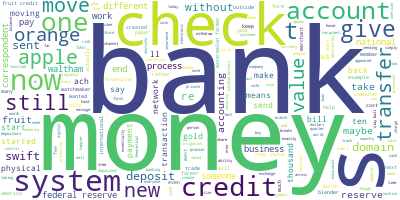

In [28]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['processed_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [29]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df.processed_text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bansharee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2)]


In [31]:
from pprint import pprint

# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"money" + 0.024*"bank" + 0.011*"banks" + 0.008*"new" + 0.008*"system" '
  '+ 0.008*"reserve" + 0.007*"dollars" + 0.006*"waltham" + 0.006*"swift" + '
  '0.006*"accounting"'),
 (1,
  '0.017*"value" + 0.013*"money" + 0.012*"banks" + 0.012*"system" + '
  '0.010*"bank" + 0.010*"credits" + 0.008*"fruit" + 0.008*"real" + '
  '0.008*"could" + 0.007*"account"'),
 (2,
  '0.031*"bank" + 0.015*"money" + 0.013*"one" + 0.012*"check" + '
  '0.008*"credits" + 0.007*"would" + 0.007*"give" + 0.006*"system" + '
  '0.006*"fruit" + 0.006*"physical"')]


## Analyzing Gensim Model Results

In [32]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/opt/homebrew/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1429: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.031886 -0.066257       1        1  38.733913
2     -0.074173  0.005918       2        1  32.317568
1      0.042287  0.060339       3        1  28.948519, topic_info=       Term       Freq      Total Category  logprob  loglift
88    value  11.000000  11.000000  Default  30.0000  30.0000
44      one  13.000000  13.000000  Default  29.0000  29.0000
91     real   5.000000   5.000000  Default  28.0000  28.0000
156   money  46.000000  46.000000  Default  27.0000  27.0000
53    fruit   8.000000   8.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
25    still   2.776015   8.925660   Topic3  -5.3307   0.0717
120  farmer   2.425699   6.778648   Topic3  -5.4656   0.2120
2    orange   2.393865   6.811468   Topic3  -5.4788   0.1940
691   swift   2.238988   7.657828   Topic3  -5.5457   0.0099
22    maybe   2.132490   6.236560   Topic3  -5.5944   0.1665

[202 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
542       3  0.506137  absolutely
240       1  0.365131     account
240       2  0.273848     account
240       3  0.365131     account
484       1  0.788577  accounting
...     ...       ...         ...
47        1  0.491461       worth
47        3  0.491461       worth
11        1  0.261218       would
11        2  0.653044       would
11        3  0.130609       would

[253 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])